# Weather at USA
## by Mohamed M. Saad

## Preliminary Wrangling

This document explores a dataset containing Storm Events database from January 1950 to May 2020, as entered by NOAA's National Weather Service (NWS). Bulk data are available in comma-separated files (CSV)from the following link https://www.ncdc.noaa.gov/stormevents/ftp.jsp

In [127]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', 100)

%matplotlib inline

In [ ]:
import glob

def read_path(path_pattern):
    files = glob.glob(path_pattern)
    files_df = []
    for file in files:
        file_df = pd.read_csv(file, index_col=None)
        files_df.append(file_df)
    return pd.concat(files_df, axis=0, ignore_index=True)
    

# Location
loc_df = read_path("data/files/StormEvents_locations-ftp_v1.0*.csv")
# Details
det_df = read_path("data/files/StormEvents_details-ftp_v1.0*.csv")
# Fatality
fat_df = read_path("data/files/StormEvents_fatalities-ftp_v1.0*.csv")

In [24]:
print(det_df.shape)
print(det_df.dtypes)
det_df.head()

(1625810, 51)
BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID            float64
EVENT_ID                int64
STATE                  object
STATE_FIPS            float64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE            object
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            floa

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,199007,31,2155,199007,31,2155,NaN,9984134,ARIZONA,4.0,1990,July,Thunderstorm Wind,C,13,MARICOPA,PHX,31-JUL-90 21:55:00,CST,31-JUL-90 21:55:00,0,0,0,0,0,0,NaN,60.00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,33.42,-111.72,NaN,NaN,NaN,NaN,PUB
1,199005,16,1320,199005,16,1320,NaN,10070939,MISSOURI,29.0,1990,May,Hail,C,217,VERNON,SGF,16-MAY-90 13:20:00,CST,16-MAY-90 13:20:00,0,0,0,0,0,0,NaN,0.75,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,37.83,-94.37,NaN,NaN,NaN,NaN,PUB
2,199012,21,1107,199012,21,1107,NaN,10046816,LOUISIANA,22.0,1990,December,Hail,C,13,BIENVILLE,SHV,21-DEC-90 11:07:00,CST,21-DEC-90 11:07:00,0,0,0,0,0,0,NaN,2.00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,32.45,-92.98,NaN,NaN,NaN,NaN,PUB
3,199004,1,1812,199004,1,1812,NaN,9981938,ALABAMA,1.0,1990,April,Thunderstorm Wind,C,5,BARBOUR,MGM,01-APR-90 18:12:00,CST,01-APR-90 18:12:00,0,0,0,0,0,0,NaN,0.00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.78,-85.30,NaN,NaN,NaN,NaN,PUB
4,199003,12,2147,199003,12,2147,NaN,10037649,KANSAS,20.0,1990,March,Hail,C,177,SHAWNEE,TOP,12-MAR-90 21:47:00,CST,12-MAR-90 21:47:00,0,0,0,0,0,0,NaN,1.75,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,38.95,-95.67,NaN,NaN,NaN,NaN,PUB


In [26]:
det_df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,1.625810e+06,1.625810e+06,1.625810e+06,1.625810e+06,1.625810e+06,1.625810e+06,1.393571e+06,1.625810e+06,1.625809e+06,1.625810e+06,1.625810e+06,1.625810e+06,1.625810e+06,1.625810e+06,1.625810e+06,948372.000000,337.000000,266235.000000,266235.000000,2406.000000,890191.000000,889814.000000,1.006755e+06,1.006755e+06,829265.000000,829266.000000
mean,2.004722e+05,1.502856e+01,1.322527e+03,2.004722e+05,1.634418e+01,1.480380e+03,6.184979e+05,3.514162e+06,3.174330e+01,2.004663e+03,9.469517e+01,9.426132e-02,8.349684e-03,1.152902e-02,1.672397e-03,25.925010,1.415430,0.891423,32.986968,104.323358,2.371434,2.315136,3.782298e+01,-9.095240e+01,37.873028,-90.728039
std,1.183986e+03,9.081408e+00,6.676216e+02,1.183986e+03,9.087400e+00,6.054207e+02,1.626280e+06,3.771947e+06,1.726070e+01,1.184043e+01,1.121000e+02,3.883039e+00,1.991803e+00,6.214175e-01,6.174572e-02,35.979737,0.969536,8.077140,128.374811,83.544902,6.068141,4.689116,4.908284e+00,1.018065e+01,4.933015,10.444057
min,1.950010e+05,1.000000e+00,0.000000e+00,1.950010e+05,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.950000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.440000e+01,-1.710327e+02,-14.456000,-170.905900
25%,1.999070e+05,7.000000e+00,9.000000e+02,1.999070e+05,8.000000e+00,1.150000e+03,6.133700e+04,4.295652e+05,1.900000e+01,1.999000e+03,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.880000,1.000000,0.000000,0.000000,47.000000,0.000000,0.000000,3.440000e+01,-9.753000e+01,34.560000,-97.402075
50%,2.007060e+05,1.500000e+01,1.515000e+03,2.007060e+05,1.600000e+01,1.611000e+03,1.225850e+05,8.582035e+05,3.000000e+01,2.007000e+03,6.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,1.000000,0.000000,0.000000,93.000000,1.000000,1.000000,3.798000e+01,-9.135000e+01,38.041200,-90.800000
75%,2.013070e+05,2.300000e+01,1.820000e+03,2.013070e+05,2.400000e+01,1.908000e+03,1.158066e+06,5.549085e+06,4.500000e+01,2.013000e+03,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52.000000,1.000000,0.000000,10.000000,139.000000,3.000000,3.000000,4.132000e+01,-8.342000e+01,41.340000,-82.960000
max,2.020050e+05,3.100000e+01,2.359000e+03,2.020050e+05,3.100000e+01,2.359000e+03,9.900000e+08,9.900000e+08,9.900000e+01,2.020000e+03,8.760000e+02,1.700000e+03,2.400000e+03,6.380000e+02,2.000000e+01,22000.000000,5.000000,2315.000000,4576.000000,810.000000,3749.000000,925.000000,7.050290e+01,1.714000e+02,70.434200,171.400000


In [128]:
det_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625810 entries, 0 to 1625809
Data columns (total 51 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   BEGIN_YEARMONTH     1625810 non-null  int64  
 1   BEGIN_DAY           1625810 non-null  int64  
 2   BEGIN_TIME          1625810 non-null  int64  
 3   END_YEARMONTH       1625810 non-null  int64  
 4   END_DAY             1625810 non-null  int64  
 5   END_TIME            1625810 non-null  int64  
 6   EPISODE_ID          1393571 non-null  float64
 7   EVENT_ID            1625810 non-null  int64  
 8   STATE               1625809 non-null  object 
 9   STATE_FIPS          1625809 non-null  float64
 10  YEAR                1625810 non-null  int64  
 11  MONTH_NAME          1625810 non-null  object 
 12  EVENT_TYPE          1625810 non-null  object 
 13  CZ_TYPE             1625810 non-null  object 
 14  CZ_FIPS             1625810 non-null  int64  
 15  CZ_NAME        

In [23]:
print(loc_df.shape)
print(loc_df.dtypes)
loc_df.head()

(1318987, 11)
YEARMONTH          object
EPISODE_ID         object
EVENT_ID           object
LOCATION_INDEX     object
RANGE             float64
AZIMUTH            object
LOCATION           object
LATITUDE          float64
LONGITUDE         float64
LAT2              float64
LON2              float64
dtype: object


,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201603,102667,615187,1,2.82,SSE,ANTIOCH,34.6800,-97.4000,3440800.0,9724000.0
1,201603,102667,615188,1,1.84,WSW,SCULLIN,34.5100,-96.8900,3430600.0,9653400.0
2,201603,102667,615189,1,0.00,N,CONNERVILLE,34.4500,-96.6300,3427000.0,9637800.0
3,201603,102667,615190,1,0.00,N,ATOKA,34.3800,-96.1300,3422800.0,967800.0
4,201603,102693,625566,1,3.00,ESE,GASTON,45.4134,-123.0729,4524804.0,1234374.0


In [25]:
print(fat_df.shape)
print(fat_df.dtypes)
fat_df.head()

(18413, 11)
FAT_YEARMONTH          int64
FAT_DAY                int64
FAT_TIME               int64
FATALITY_ID            int64
EVENT_ID               int64
FATALITY_TYPE         object
FATALITY_DATE         object
FATALITY_AGE         float64
FATALITY_SEX          object
FATALITY_LOCATION     object
EVENT_YEARMONTH      float64
dtype: object


,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,197602,17,2000,1005939,9980316,D,02/17/1976 20:00:00,NaN,NaN,NaN,197602.0
1,197602,18,730,1005940,10050793,D,02/18/1976 07:30:00,NaN,NaN,NaN,197602.0
2,197602,21,215,1005941,10057267,D,02/21/1976 02:15:00,NaN,NaN,NaN,197602.0
3,197603,29,1515,1005942,9982291,D,03/29/1976 15:15:00,NaN,NaN,NaN,197603.0
4,197603,29,1525,1005943,9982292,D,03/29/1976 15:25:00,NaN,NaN,NaN,197603.0


### What is the structure of your dataset?

The data used in this investigation is structured in three set of files
- Storm details
- Storm location
- Storm fatalities

The first set of files gives detailed information about the storm itself. The storm attributes are:
- **BEGIN YEARMONTH**: The year and month that the event began
- **BEGIN DAY**: The day of the month that the event began
- **BEGIN TIME**: The time of day that the event began
- **END YEARMONTH**: The year and month that the event ended
- **END DAY**: The day of the month that the event ended
- **END TIME**: The time of day that the event ended
- **EPISODE ID**: ID assigned by NWS to denote the storm episode; Episodes may contain multiple Events.
- **EVENT ID**: ID assigned by NWS for each individual storm event contained within a storm episode;
- **STATE**: The state name where the event occurred
- **STATE FIPS**: A unique number assigned to the county
- **YEAR**: The four digit year for the event in this record.
- **MONTH NAME**: The name of the month for the event in this record
- **EVENT TYPE**: Storm type**: Hail, Thunderstorm Wind, Snow, Ice
- **CZ TYPE**: Indicates whether the event happened in a (C) County/Parish, (Z) NWS Public Forecast Zone or (M) Marine.
- **CZ FIPS**: The county FIPS number is a unique number assigned to the county
- **CZ NAME**: County/Parish, Zone or Marine Name assigned to the county
- **WFO**: The National Weather Service Forecast Office’s area of responsibility
- **BEGIN DATE TIME**: The date that the event began
- **CZ TIMEZONE**: The timezone that the event began
- **END DATE TIME**: The date that the event ended
- **INJURIES DIRECT**: The number of injuries directly caused by the weather event.
- **INJURIES INDIRECT**: The number of injuries indirectly caused by the weather event.
- **DEATHS DIRECT**: The number of deaths directly caused by the weather event.
- **DEATHS INDIRECT**: The number of deaths indirectly caused by the weather event.
- **DAMAGE PROPERTY**: The estimated amount of damage to property incurred by the weather event
- **DAMAGE CROPS**: The estimated amount of damage to crops incurred by the weather event
- **SOURCE**: The source reporting the weather event
- **MAGNITUDE**: The measured extent of the magnitude type
- **MAGNITUDE TYPE**: EG = Wind Estimated Gust; ES = Estimated Sustained Wind; MS = Measured Sustained Wind; MG = Measured Wind Gust (no magnitude is included for instances of hail).
- **FLOOD CAUSE**: Reported or estimated cause of the flood.
- **CATEGORY**: Unknown
- **TOR F SCALE**: Enhanced Fujita Scale describes the strength of the tornado based on the amount and type of damage caused by the tornado
- **TOR LENGTH**: Length of the tornado or tornado segment while on the ground (in miles to the tenth).
- **TOR WIDTH**: Width of the tornado or tornado segment while on the ground (in feet).
- **TOR OTHER WFO**: Indicates the continuation of a tornado segment as it crossed from one National Weather Service Forecast Office to another
- **TOR OTHER CZ STATE**: The two-character representation for the state name of the continuing tornado segment as it crossed from one county or zone to another
- **TOR OTHER CZ FIPS**: The FIPS number of the county entered by the continuing tornado segment as it crossed from one county to another
- **TOR OTHER CZ NAME**: The FIPS name of the county entered by the continuing tornado segment as it crossed from one county to another
- **BEGIN RANGE**: The distance to the nearest tenth of a mile, to the location referenced below.
- **BEGIN AZIMUTH**: 16-point compass direction from the location referenced below.
- **BEGIN LOCATION**: The name of city, town or village from which the range is calculated and the azimuth is determined.
- **END RANGE**: The distance to the nearest tenth of a mile, to the location referenced below.
- **END AZIMUTH**: 16-point compass direction from the location referenced below.
- **END LOCATION**: The name of city, town or village from which the range is calculated and the azimuth is determined.
- **BEGIN LAT**: The latitude in decimal degrees of the begin point of the event or damage path.
- **BEGIN LON**: The longitude in decimal degrees of the begin point of the event or damage path.
- **END LAT**: The latitude in decimal degrees of the end point of the event or damage path
- **END LON**: The longitude in decimal degrees of the end point of the event or damage path
- **EPISODE NARRATIVE**: The episode narrative depicting the general nature and overall activity of the episode
- **EVENT NARRATIVE**: The event narrative provides descriptive details of the individual event.
- **DATA SOURCE**: The source reporting the weather event


### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

Let's start our exploration by looking at the main variables of interest. Is the distribution skewed or symmetric? Is it unimodal or multimodal?


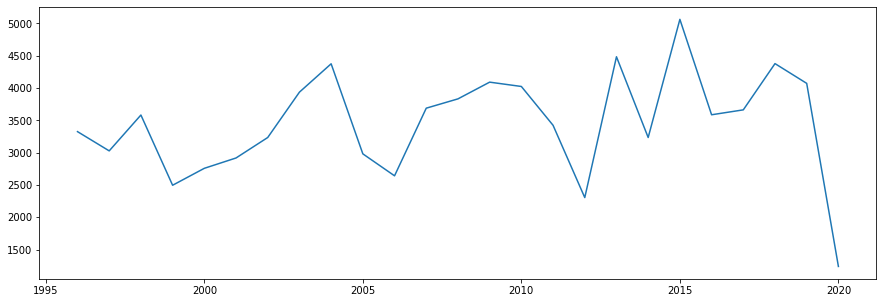

In [125]:
plt.figure(figsize = [15, 5])
plt.plot(det_df[det_df['EVENT_TYPE'] == 'Flash Flood'][['YEAR', 'BEGIN_YEARMONTH']].groupby(['YEAR']).agg(['count']));

In [126]:
det_df[det_df['EVENT_TYPE'] == 'Flash Flood'].describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,86349.000000,86349.000000,86349.000000,86349.000000,86349.000000,86349.000000,8.634900e+04,8.634900e+04,86349.000000,86349.000000,86349.000000,86349.000000,86349.000000,86349.000000,86349.000000,86.000000,0.0,0.0,0.0,0.0,56852.000000,56874.000000,54738.000000,54738.000000,54738.000000,54738.000000
mean,200836.047401,15.767085,1340.730466,200836.047401,15.910642,1360.452443,6.383356e+05,2.479075e+06,31.962709,2008.295533,102.277235,0.074187,0.000614,0.017904,0.000637,34.644767,NaN,NaN,NaN,NaN,2.660434,2.795794,36.471846,-91.422544,36.462123,-91.414335
std,701.031142,8.860588,649.848723,701.031142,8.865894,689.665662,7.419341e+05,2.457473e+06,17.551686,7.009451,105.891245,5.077462,0.031736,0.261714,0.033163,111.983426,NaN,NaN,NaN,NaN,4.493732,4.604573,5.254325,12.882966,5.252011,12.882134
min,199601.000000,1.000000,0.000000,199601.000000,1.000000,0.000000,1.000000e+01,9.000000e+00,1.000000,1996.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,-14.400000,-171.032700,-14.456000,-170.905900
25%,200303.000000,8.000000,830.000000,200303.000000,8.000000,800.000000,6.889000e+04,4.137190e+05,20.000000,2003.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,33.527700,-97.200000,33.520050,-97.180000
50%,200905.000000,16.000000,1500.000000,200905.000000,16.000000,1515.000000,1.274360e+05,7.654270e+05,32.000000,2009.000000,77.000000,0.000000,0.000000,0.000000,0.000000,3.550000,NaN,NaN,NaN,NaN,1.000000,2.000000,36.880000,-91.477900,36.877550,-91.462050
75%,201505.000000,23.000000,1845.000000,201505.000000,24.000000,1930.000000,1.162940e+06,5.393287e+06,47.000000,2015.000000,135.000000,0.000000,0.000000,0.000000,0.000000,6.750000,NaN,NaN,NaN,NaN,3.000000,3.000000,39.959975,-82.650000,39.951375,-82.630550
max,202005.000000,31.000000,2359.000000,202005.000000,31.000000,2359.000000,2.414708e+06,5.724797e+06,99.000000,2020.000000,840.000000,800.000000,3.000000,36.000000,5.000000,800.000000,NaN,NaN,NaN,NaN,177.000000,176.000000,65.621700,144.800000,65.616500,144.800000


In [123]:
det_df['EVENT_TYPE'].value_counts()

Thunderstorm Wind              455022
Hail                           371570
Flash Flood                     86349
Winter Storm                    75085
High Wind                       71732
                                ...  
TORNADOES, TSTM WIND, HAIL          1
THUNDERSTORM WINDS/FLOODING         1
THUNDERSTORM WIND/ TREE             1
TORNADO/WATERSPOUT                  1
OTHER                               1
Name: EVENT_TYPE, Length: 74, dtype: int64

### Tornados

In [86]:
tor_df = det_df[det_df['EVENT_TYPE'] == 'Tornado'][['YEAR', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO']]

In [87]:
tor_df.describe()

,YEAR,TOR_LENGTH,TOR_WIDTH
count,71554.000000,71526.000000,71526.000000
mean,1990.832756,3.229164,122.761408
std,19.124505,7.029263,224.315452
min,1950.000000,0.000000,0.000000
25%,1975.000000,0.200000,30.000000
50%,1994.000000,1.000000,50.000000
75%,2007.000000,3.600000,100.000000
max,2020.000000,500.000000,4576.000000


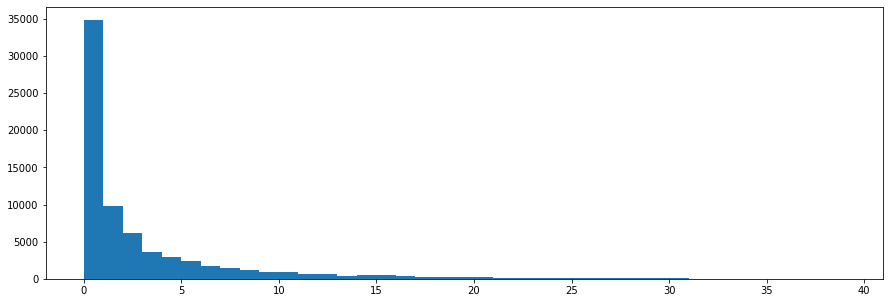

In [88]:
plt.figure(figsize = [15, 5])
plt.hist(data = tor_df[tor_df['TOR_LENGTH'] < 50], x= 'TOR_LENGTH', bins = np.arange(0, 40, 1));

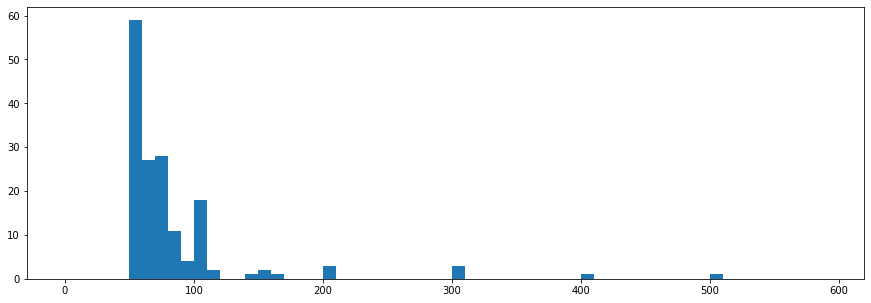

In [89]:
plt.figure(figsize = [15, 5])
plt.hist(data = tor_df[(tor_df['TOR_LENGTH'] >= 50)], x= 'TOR_LENGTH', bins = np.arange(0, 600, 10));

In [90]:
tor_df[tor_df['TOR_LENGTH'] >= 500].head(20)

,YEAR,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO
626468,1995,500.0,10.0,NaN


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!